In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy
# import acquire
# import prepare
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")
# importing my personal wrangle module
import wrangle

In [2]:
# Acquiring the data using the above module
zillow_data = wrangle.get_zillow_data()
zillow = zillow_data.copy()
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
# Using my wrangle module to clean and prep the data. NaNs are dropped; so are outliers. 
# In the end, I added an 'age' column and deleted the yearbuilt column (which was more like a categorical variable)
# No outliers were removed from year built, age, or fips
zillow = wrangle.clean_and_prep_data(zillow)

Consider dropping yearbuilt as a column--this is a categorical and is closely related to age, which will be the feature we use instead.

Consider the k value used removing outliers--there are a couple features that may be better with a different value.  I'm thinking of the 1 bedroom houses, for example.

In [4]:
zillow.head()

,bedrooms,bathrooms,sq_ft,tax_value,tax_amount,county,age
6,3.0,4.0,1620.0,847770.0,10244.94,LA,10
7,3.0,2.0,2077.0,646760.0,7924.68,LA,95
18,3.0,1.0,1244.0,169471.0,2532.88,LA,71
19,3.0,2.0,1300.0,233266.0,3110.99,LA,71
20,3.0,2.0,1222.0,290492.0,3870.25,LA,70


In [5]:
zillow.shape

(1854286, 7)

In [6]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854286 entries, 6 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sq_ft       float64
 3   tax_value   float64
 4   tax_amount  float64
 5   county      object 
 6   age         int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 113.2+ MB


In [7]:
# checking for null values
zillow.isnull().sum()

bedrooms      0
bathrooms     0
sq_ft         0
tax_value     0
tax_amount    0
county        0
age           0
dtype: int64

In [8]:
# This is a for loop that is checking every column for any white space. there isn't any
# also the NaNs, actually. gone now.
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'tax_amount', 'county','age']
for col in cols:
    print(zillow[col].value_counts(dropna=False,ascending=True))

5.0     89402
2.0    320442
4.0    539616
3.0    904826
Name: bedrooms, dtype: int64
1.75         3
3.50     12347
1.50     30713
4.00     31936
2.50    132322
3.00    351864
1.00    385677
2.00    909424
Name: bathrooms, dtype: int64
240.0        1
462.0        1
475.0        1
457.0        1
430.0        1
          ... 
1440.0    3617
1400.0    3776
1120.0    4286
1080.0    4313
1200.0    5091
Name: sq_ft, Length: 3013, dtype: int64
366635.0      1
134066.0      1
714231.0      1
648536.0      1
73381.0       1
           ... 
440000.0    671
430000.0    677
400000.0    701
500000.0    753
450000.0    806
Name: tax_value, Length: 457377, dtype: int64
1451.43      1
2883.43      1
1737.88      1
6793.34      1
3041.35      1
          ... 
388.18      36
49.18       45
343.52      65
344.18      71
345.72     164
Name: tax_amount, Length: 710127, dtype: int64
Ventura     144730
Orange      468237
LA         1241319
Name: county, dtype: int64
220        1
142        1
147        1
159

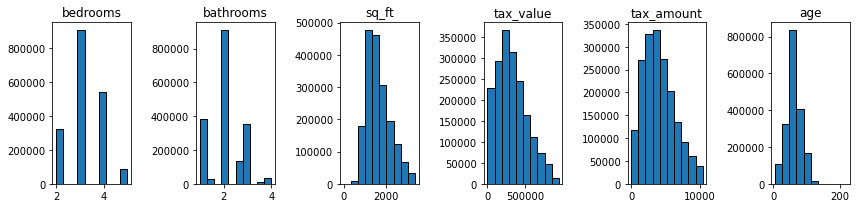

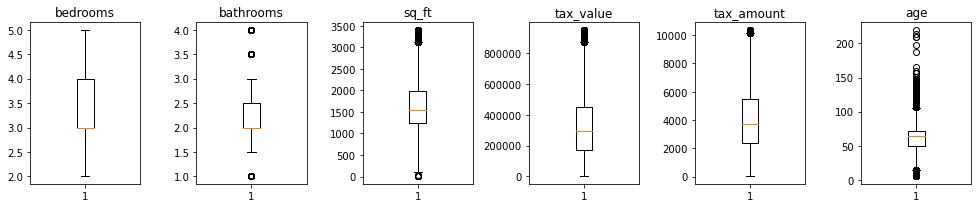

In [9]:
# Here, we create a for loop that makes a histogram for every column. This is the start of my univariate analysis

plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms','sq_ft','tax_value','tax_amount', 'age']
# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,8, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()
    
,

plt.figure(figsize=(16, 3))

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    plt.boxplot(zillow[col])
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()

In [10]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1854286.0,3.214626,0.781417,2.00,3.00,3.000,4.00,5.00
bathrooms,1854286.0,2.053597,0.707624,1.00,2.00,2.000,2.50,4.00
sq_ft,1854286.0,1653.708797,564.431972,1.00,1231.00,1548.000,1988.00,3408.00
tax_value,1854286.0,327950.340734,198952.851381,22.00,173849.25,296630.000,452500.00,950835.00
tax_amount,1854286.0,4069.361201,2242.130593,16.48,2366.68,3747.145,5487.42,10377.04
age,1854286.0,61.556180,20.545447,5.00,49.00,64.000,72.00,220.00


### Notice the minimum bedrooms is 2.  I'm sure there were some useful one bedrooms before I removed the outliers.
### The minimum of 1 square foot isn't correct and should be addressed after arriving at MVP
- think about truncating where sq_ft < 200 or looking at the data and seeing if there's something else wrong

## Next steps: encode columns and split
### Encode the following:
- ['fips'] .... on second thought, only encode fips.
- bedrooms and bathrooms could be encoded ordinally after you achieve MVP. sklearn.preprocessing.OrdinalEncoder
- I will not use the yearbuilt in the final analysis, and instead use age, which is almost the same thing for my purposes.

In [11]:
zillow.shape

(1854286, 7)

In [12]:
encoded = wrangle.encode_zillow(zillow)
encoded.shape

(1854286, 10)

In [ ]:
encoded.info()

In [ ]:
encoded.head(10)

# SPLITTING

In [24]:
train, test, validate = wrangle.split_zillow(encoded)
train.shape, test.shape, validate.shape

((1038399, 10), (445029, 10), (370858, 10))

# DATA EXPLORATION--BIVARIATE AND MULTIVARIATE

In [25]:
correlation = train.corr(method='pearson')

<AxesSubplot:>

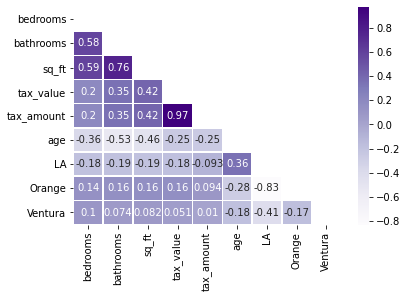

In [26]:
sns.heatmap(correlation, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(correlation))

### Make a note of how closely correlated my tax_value and tax_amount are.  I'm of the opinion that this is target leakage.  

In [27]:
# takes infinity to run, am i coding it right?
#sns.countplot(x=zillow.tax_value,data=zillow)

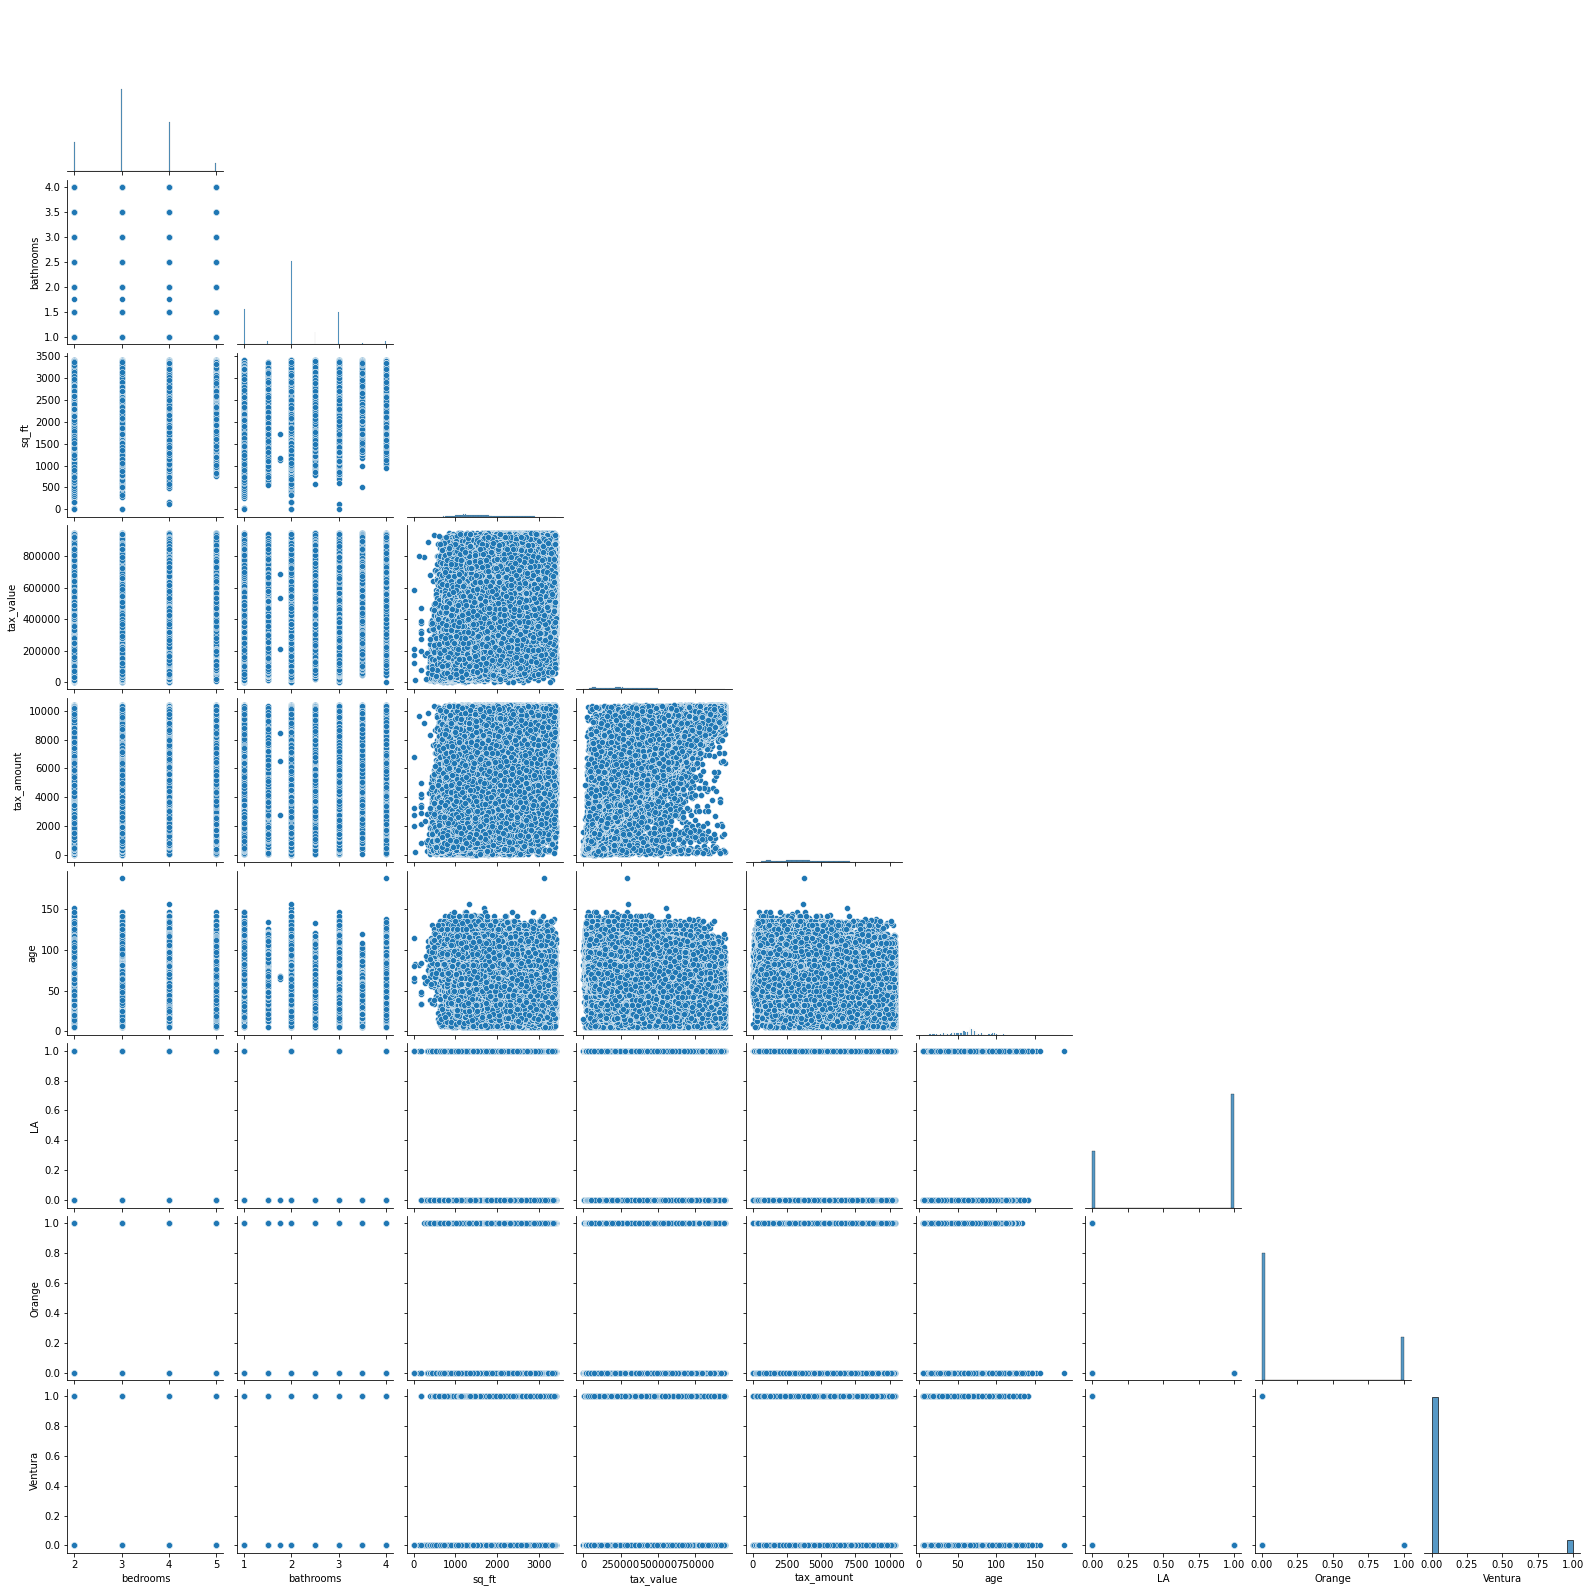

In [28]:
sns.pairplot(data=train, corner=True)#, hue='tax_value')

plt.show()

# Identical visualization as for the whole set (just checking i didn't do something wrong)
# Noot a whole lot of useful info, visually speaking

In [29]:
train.head()

,bedrooms,bathrooms,sq_ft,tax_value,tax_amount,county,age,LA,Orange,Ventura
537465,3.0,2.5,1971.0,383099.0,3895.40,Orange,34,0,1,0
554109,4.0,2.0,1878.0,396577.0,4952.22,LA,62,1,0,0
307369,2.0,2.0,1001.0,209965.0,2528.27,LA,72,1,0,0
1311281,3.0,2.0,1474.0,63182.0,1032.70,Orange,66,0,1,0
1755944,3.0,2.0,1221.0,260804.0,3364.06,LA,70,1,0,0


## Research question number 1: 

Are bigger houses valued higher?

<AxesSubplot:title={'center':'There seems to be a positive correlation between square feet and tax_value'}, xlabel='sq_ft', ylabel='tax_value'>

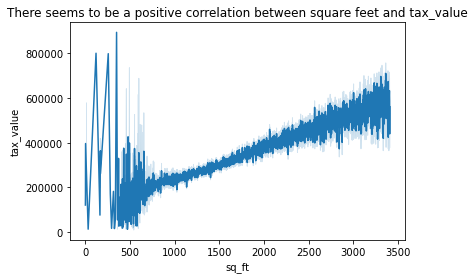

In [30]:
plt.title('There seems to be a positive correlation between square feet and tax_value')

sns.lineplot(x=train.sq_ft, y=train.tax_value)


Hypothesis testing: 

    H_o: Square feet and tax_value are not related
    H_a: Square feet and tax_value are related
    
    The null hypothesis is rejected by the stats test

In [31]:
alpha = 0.05

corr, p = stats.pearsonr(train.sq_ft, train.tax_value)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.4215323088082429, 0.0)

### There is a moderate correlation between the variables.

In [32]:
 sns.lmplot(x=train.sq_ft, y=train.tax_value, data=zillow)#, scatter=True, hue=None, col=None)

KeyError: "None of [Float64Index([     1.0,      2.0,      3.0,     22.0,     23.0,     32.0,\n                 120.0,    164.0,    169.0,    170.0,\n              ...\n              950000.0, 950274.0, 950500.0, 950555.0, 950682.0, 950683.0,\n              950687.0, 950781.0, 950809.0, 950835.0],\n             dtype='float64', length=348000)] are in the [columns]"